# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [2]:
# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt

# import our own code
from Household import HouseholdSpecializationModelClass

# Question 1

Optimal $H_M/H_F$ given varying $\alpha$ and $\sigma$ values.

In [4]:
# a. load model as the household class
model = HouseholdSpecializationModelClass()

# b. defining the axis-values and empty H-ratio matrix for optimal solutions
N = 3
alpha_vec = np.linspace(0.25,0.75,N)
sigma_vec = np.linspace(0.5,1.5,N)
H_ratio = np.zeros((N,N))

# c. solve optimal allocation and input into H-ratio matrix
for i, alpha in enumerate(alpha_vec):
    model.par.alpha = alpha #set alpha value
    
    for j, sigma in enumerate(sigma_vec):
        model.par.sigma = sigma #set sigma value given the alpha value
        
        opt = model.solve_discrete() #optimal allocation solution
        HF = opt.HF
        HM = opt.HM
        H_ratio[i,j] = HF/HM #input H_ratio into matrix

print('The optimal H-ratios are given below, with sigma on the x-axis and alpha on the y-axis:')
print(H_ratio)

# d. resetting changed parameters
model.par.alpha = 0.5 
model.par.sigma = 1 

The optimal H-ratios are given below, with sigma on the x-axis and alpha on the y-axis
[[0.54545455 0.30769231 0.21428571]
 [1.         1.         1.        ]
 [1.83333333 3.25       4.66666667]]


Plotting the figure in 3d

C:\Users\PerLi\AppData\Local\Temp\ipykernel_3184\1051070507.py:20: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 11.5


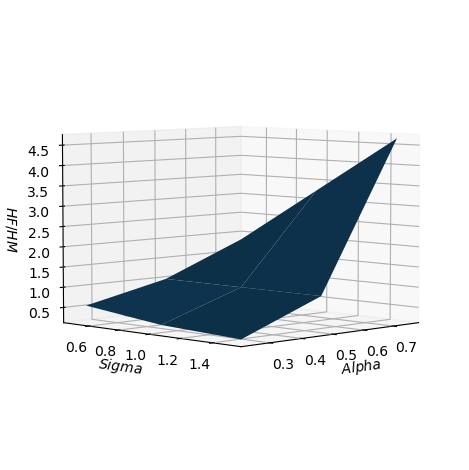

In [3]:
# %matplotlib widget

# a. 3d plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
alpha_mesh,sigma_mesh = np.meshgrid(alpha_vec,sigma_vec,indexing='ij')
ax.plot_surface(alpha_mesh,sigma_mesh,H_ratio)

# b. labels
ax.set_xlabel('$Alpha$') 
ax.set_ylabel('$Sigma$')
ax.set_zlabel('$HF/HM$')

# c. invert xaxis
ax.invert_xaxis()

# d. set view angle and distance
ax.view_init(elev=5, azim=45, roll=0)
ax.dist = 11.5

# tight layout
fig.tight_layout()

# Question 2

Explain your code and procedure

In [4]:
# a. solve the discrete solution and save the log of household work ratio
sol_discrete = model.solve_wF_vec(discrete=True)
logH_ratio_discrete = np.log(sol_discrete.HF_vec/sol_discrete.HM_vec)


Plot the solution

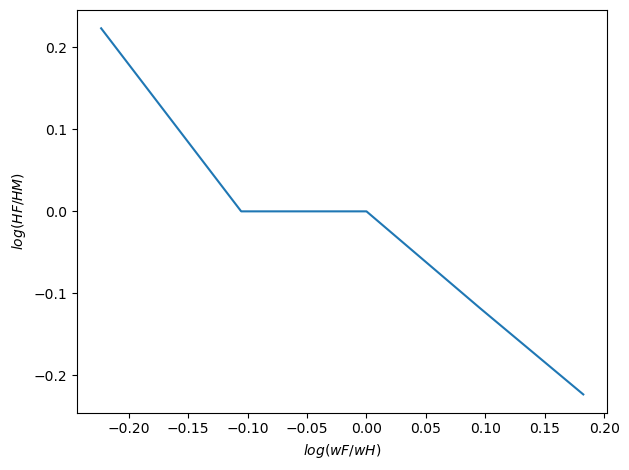

In [5]:
# a. plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.log(model.par.wF_vec),logH_ratio_discrete)

# b. labels
ax.set_xlabel('$log(wF/wH)$') 
ax.set_ylabel('$log(HF/HM)$')

# tight layout 
fig.tight_layout()

# Question 3

Solution for the continous model

In [6]:
# a. solve the continuous solution and save the log of household work ratio
sol = model.solve_wF_vec()
logH_ratio = np.log(sol.HF_vec/sol.HM_vec)

Plot the solution

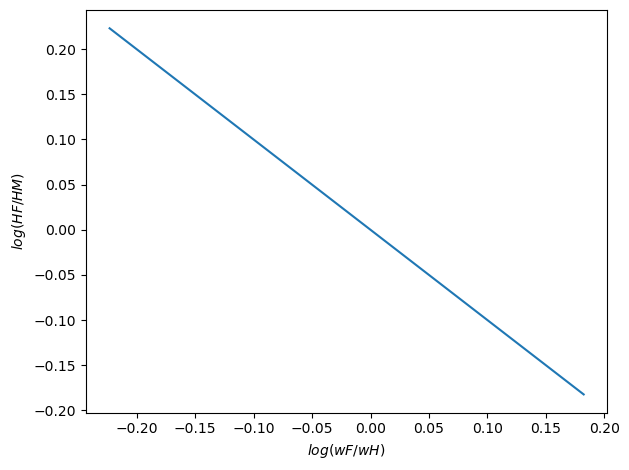

In [7]:
# a. plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.log(model.par.wF_vec),logH_ratio)

# b. labels
ax.set_xlabel('$log(wF/wH)$') 
ax.set_ylabel('$log(HF/HM)$')

# tight layout 
fig.tight_layout()

# Question 4

Solution for alpha and sigma, which minimizes the error. 

In [8]:
# a. minimize the squared error using alpha and sigma and save solution
q4sol = model.estimate()
q4_alpha = model.par.alpha
q4_sigma = model.par.sigma
q4_error = q4sol.error

# b. print the solution, that minimizes the squared error
print(f'The squared error is minimized, when alpha is {model.par.alpha:.3f} and sigma is {model.par.sigma:.3f}.')
print(f'At these values our beta0 and beta1 coefficients are {model.sol.beta0:.3f} and {model.sol.beta1:.3f}.') 
print(f'With this the minimized squared error is then {q4sol.error:.3f}.') 

c:\Users\PerLi\projects-2023-jacob-per\inauguralproject\Household.py:75: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-par.alpha)*HM**sigma_ + (par.alpha)*HF**sigma_)**((sigma_)**-1)
c:\Users\PerLi\projects-2023-jacob-per\inauguralproject\Household.py:78: RuntimeWarning: invalid value encountered in double_scalars
  Q = C**par.omega*H**(1-par.omega)


The squared error is minimized, when alpha is 0.982 and sigma is 0.100.
At these values our beta0 and beta1 coefficients are 0.400 and -0.100.
With this the minimized squared error is then 0.000.


Calculate values for illustration

In [9]:
def error(alpha,sigma):
    """
    calculates and saves the squared error
    """        
    model.par.alpha = alpha # sets alpha value
    model.par.sigma = sigma # sets sigma value        
    
    model.solve_wF_vec() # finds optimal household production 
    sol = model.run_regression() # calculates beta0 and beta1
    error = (sol.beta0 - model.par.beta0_target)**2 +(sol.beta1 - model.par.beta1_target)**2 #calculates error
    return error

# a. setup of values for plotting
N = 10
alpha_vec = np.linspace(0.2,0.985,N)
sigma_vec = np.linspace(0.001,0.95,N)
error_values = np.zeros((N,N))

# b. solve optimal allocation for given alpha and sigma and input into matrix of squared errors
for i, alpha in enumerate(alpha_vec):
    model.par.alpha = alpha #set alpha value
    
    for j, sigma in enumerate(sigma_vec):
            sol = error(alpha,sigma) #optimal allocation solution
            error_values[i,j] = sol


C:\Users\PerLi\AppData\Local\Temp\ipykernel_3184\3283179058.py:21: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 11


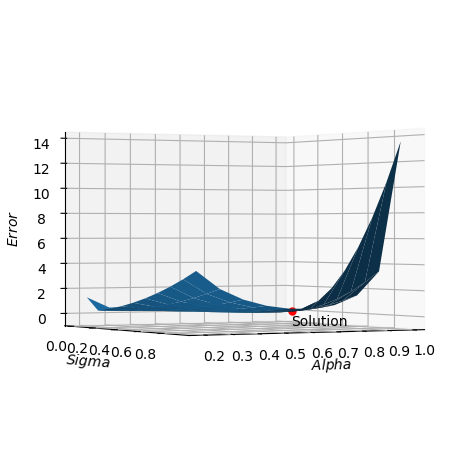

In [10]:
%matplotlib inline

# a. 3d plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
alpha_mesh,sigma_mesh = np.meshgrid(alpha_vec,sigma_vec,indexing='ij')
ax.plot_surface(alpha_mesh,sigma_mesh,error_values)
ax.scatter(q4_alpha, q4_sigma, q4_error, c='red', s=25)

# b. labels
ax.set_xlabel('$Alpha$') 
ax.set_ylabel('$Sigma$')
ax.set_zlabel('$Error$')
ax.text(q4_alpha, q4_sigma, q4_error-1.25, 'Solution')

# c. invert xaxis
ax.invert_xaxis()

# d. set view angle and distance
ax.view_init(elev=0, azim=60, roll=0)
ax.dist = 11

# e. tight layout 
fig.tight_layout()

# Question 5

With the empirical results in mind we adapt our function to hold $\alpha$ constant at 0.5 and to our model we add...

In [11]:
q5sol = model.est_alphacons()

print(f'The squared error is minimized, when alpha is {model.par.alpha} and sigma is {model.par.sigma}.')

print(f'At these values our beta0 and beta1 coefficients are {model.sol.beta0} and {model.sol.beta1}.') 

print(f'With this the minimized squared error is then {q5sol.error}.') 

c:\Users\PerLi\projects-2023-jacob-per\inauguralproject\Household.py:75: RuntimeWarning: divide by zero encountered in power
  H = ((1-par.alpha)*HM**sigma_ + (par.alpha)*HF**sigma_)**((sigma_)**-1)


The squared error is minimized, when alpha is 0.5 and sigma is [0.09970703].
At these values our beta0 and beta1 coefficients are 2.0170482692409106e-06 and -0.09968540129930945.
With this the minimized squared error is then 0.1599984853377956.


ADD CONCISE CONLUSION.